Comparing multiple runs 

Gustavo Marques (gmarques@ucar.edu)

In [1]:
from datetime import date
print("Last update:", date.today())

Last update: 2023-01-11


## Brief summary of the experiments 

* 1) CTRL-Z* 
* 2) LBD-Z* = CTRL-Z* + LBD + NNDIFF interior
* 3) CTRL-H 
* 4) LBD-H = CTRL-H + LBD + NNDIFF interior

They were all run for one cycle of the JRA-55 v1.3 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import seaborn, matplotlib
import matplotlib
import warnings, os
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import ztplot
from xyplot import xyplot
warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

Basemap module not found. Some regional plots may not function properly


In [2]:
path = '/glade/scratch/gmarques/'
path2 = '/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/'

exps = ['gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.baseline.002', \
        'gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002',  \
        'gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.baseline.002',\
        'gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.HBD.002']
labels = ['CTRL-z*', 'HBD-z*',  'CTRL-H', 'HBD-H']

# set this to true to save the plots
saveplot = True
if saveplot:
    os.system('mkdir PNG')

mkdir: cannot create directory ‘PNG’: File exists


In [3]:
def get_data(full_path, variables):
  def preprocess(ds):
    ''' Return the dataset with variable'''
    return ds[variables]
  ds = xr.open_mfdataset(full_path, data_vars='minimal', \
                         coords='minimal', compat='override', preprocess=preprocess)
  return ds

In [4]:
# load grid and pre-difined masks
grd = MOM6grid(path+exps[0]+'/run/'+exps[0]+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

MOM6 grid successfully loaded... 

11.16428 64.78855 [391, 434]


### 1.1 Globally-averaged ocean properties

/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.baseline.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.baseline.002_mon_ave_global_means.nc
/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002_mon_ave_global_means.nc
/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.baseline.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.baseline.002_mon_ave_global_means.nc
/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.HBD.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.HBD.002_mon_ave_global_means.nc


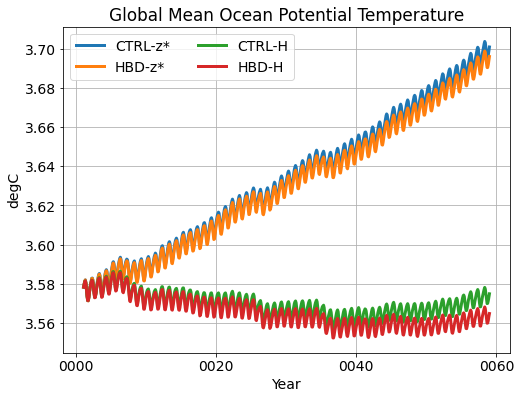

In [6]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
variables = ['thetaoga']
for i in range(len(exps)):
  tmp = path2+exps[i]+'/ncfiles/'+exps[i]+'_mon_ave_global_means.nc'
  print(tmp)
  ds = get_data(tmp,variables).sel(time=slice('0001-01-01', '0058-12-31'))
  ds['thetaoga'].plot(ax=ax, label=labels[i], lw=3)

ax.set_title(ds.thetaoga.attrs['long_name']); ax.set_ylabel(ds.thetaoga.attrs['units'])
ax.legend(ncol=2); ax.grid()
ax.set_xlabel('Year')
if saveplot:
    fname = 'PNG/temp_global_mean.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.baseline.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.baseline.002_mon_ave_global_means.nc
/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002_mon_ave_global_means.nc
/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.baseline.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.baseline.002_mon_ave_global_means.nc
/glade/u/home/gmarques/Notebooks/CESM_MOM6/G/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.HBD.002/ncfiles/gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.HBD.002_mon_ave_global_means.nc


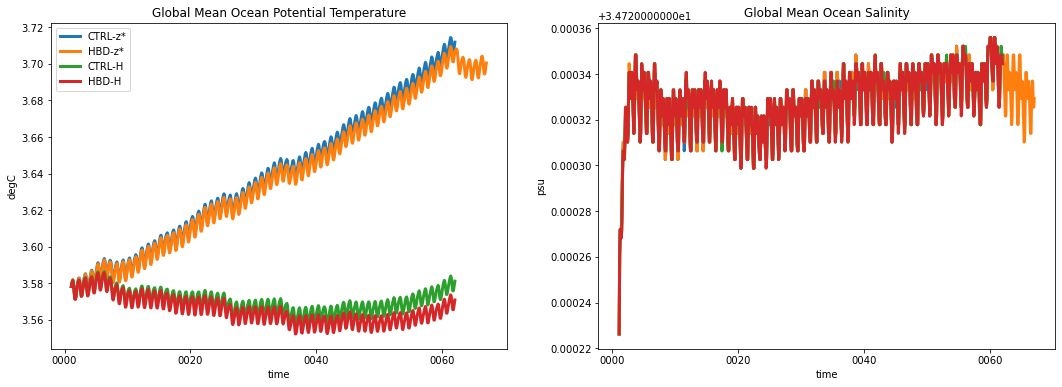

In [7]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
variables = ['thetaoga', 'soga']
for i in range(len(exps)):
  tmp = path2+exps[i]+'/ncfiles/'+exps[i]+'_mon_ave_global_means.nc'
  print(tmp)
  ds = get_data(tmp,variables)
  ds['thetaoga'].plot(ax=ax[0], label=labels[i], lw=3)
  ds['soga'].plot(ax=ax[1], lw=3)

ax[0].set_title(ds.thetaoga.attrs['long_name']); ax[0].set_ylabel(ds.thetaoga.attrs['units'])
ax[1].set_title(ds.soga.attrs['long_name']); ax[1].set_ylabel(ds.soga.attrs['units'])
ax[0].legend()
if saveplot:
    fname = 'PNG/global_means.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

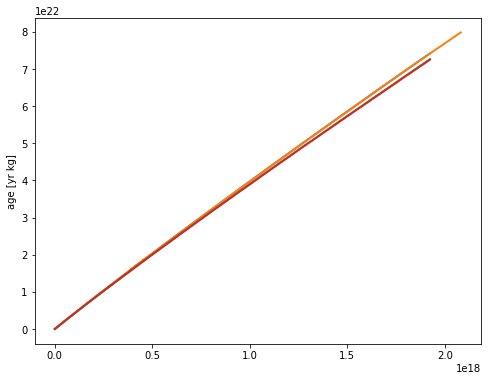

In [8]:
# ideal age
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
for i in range(len(exps)): 
  ds = xr.open_dataset(path+exps[i]+'/run/ocean.stats.nc')
  #ds = ds.isel(Time=range(1000, 21172))
  tmp = ds['age']
  tmp.plot(ax=ax, label=labels[i], lw=2)
  ax.set_xlabel('')
    
#ax.set_xlabel('Time'); ax.legend(); ax.set_xlim(1.5e18, 2e18)
#if saveplot:
#    fname = 'PNG/ocean_stats.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

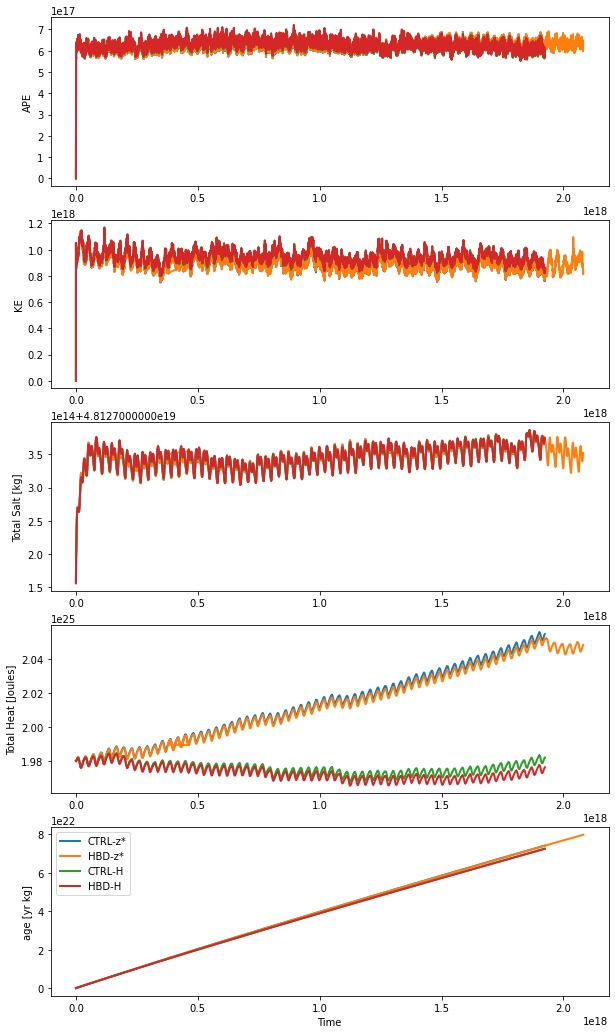

In [9]:
%matplotlib inline
variables = ['APE', 'KE', 'Salt', 'Heat', 'age']
fig, ax = plt.subplots(nrows=len(variables), ncols=1, figsize=(10,18))
for i in range(len(exps)): 
  ds = xr.open_dataset(path+exps[i]+'/run/ocean.stats.nc')
  #ds = ds.isel(Time=range(1000, 21172))
  for var, j in zip(variables, range(len(variables))):
    if len(ds[var].shape) > 1:
        tmp = ds[var].sum(axis=1)
    else:
        tmp = ds[var]
    tmp.plot(ax=ax[j], label=labels[i], lw=2)
    ax[j].set_xlabel('')
    
ax[j].set_xlabel('Time'); ax[j].legend()
if saveplot:
    fname = 'PNG/ocean_stats.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

### 1.2 Mixed layer and boundary layer depths

In [10]:
filepath = '/glade/work/gmarques/cesm/datasets/MLD/deBoyer/deBoyer_MLD_remapped_to_tx06v1.nc'
print('\n Reading climatology from: ', filepath)
mld_obs = xr.open_dataset(filepath)
months = [0,1,2]
obs_JFM = np.ma.masked_invalid(mld_obs.mld.isel(time=months).mean('time').values)
months = [6,7,8]
obs_JAS = np.ma.masked_invalid(mld_obs.mld.isel(time=months).mean('time').values)
obs_winter = obs_JAS.copy(); obs_summer = obs_JAS.copy()
j = np.abs( grd.geolat[:,0] - 0. ).argmin()
obs_winter[j::,:] = obs_JFM[j::,:]
obs_summer[0:j,:] = obs_JFM[0:j,:]

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
def add_labels(ax, nh='JFM', sh='JAS'):
    ax.plot([grd.geolon[0,0], grd.geolon[0,-1]], [0,0], 'k--', lw=0.5)
    ax.text(25, 7, nh, ha="center", va="center", size=12, bbox=bbox_props)
    ax.text(25, -7, sh, ha="center", va="center", size=12, bbox=bbox_props)


 Reading climatology from:  /glade/work/gmarques/cesm/datasets/MLD/deBoyer/deBoyer_MLD_remapped_to_tx06v1.nc


Min = 2.6997663974761963, Max = 883.0979614257812
Min = 2.7004778385162354, Max = 876.7240600585938
Min = 2.7430131435394287, Max = 1143.517578125
Min = 2.743471384048462, Max = 1221.322021484375
Min = 10.287522633870443, Max = 1251.12058890349


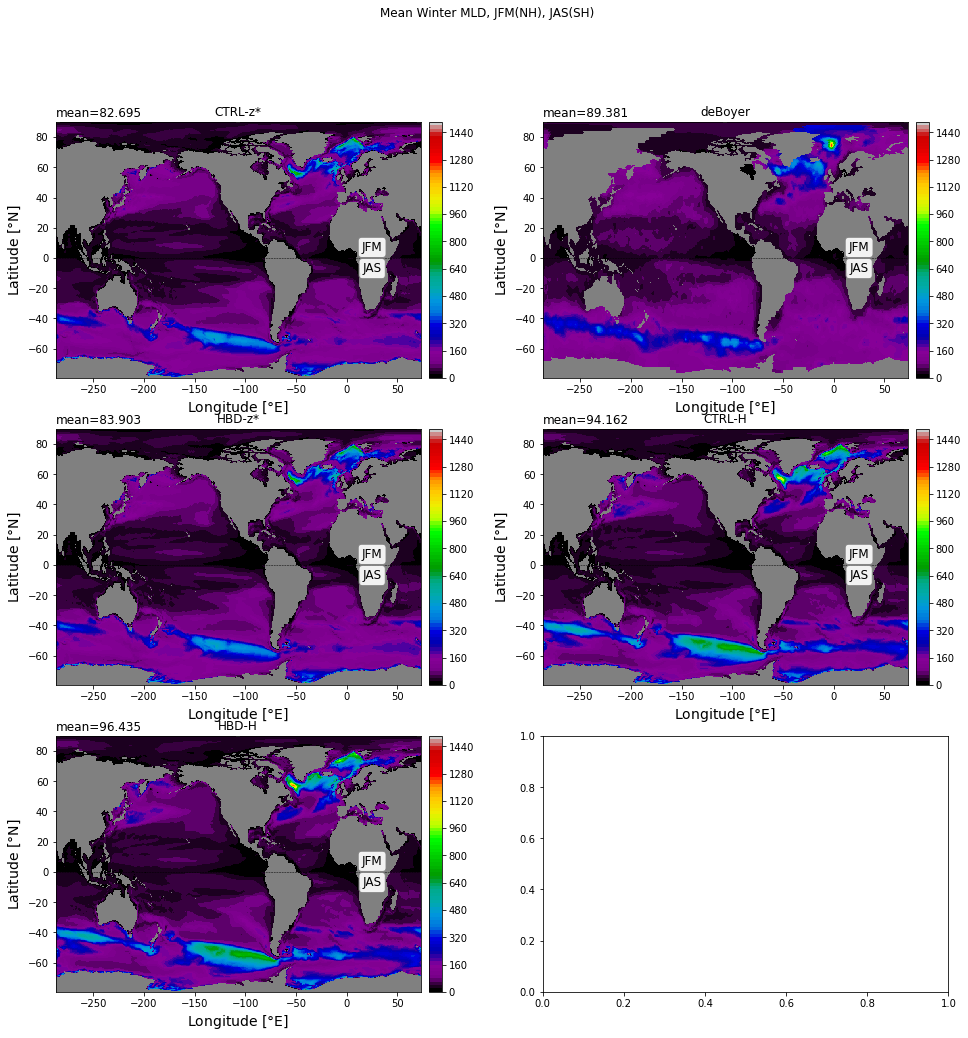

In [11]:
%matplotlib inline
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
ax1 = ax.flatten()
plt.suptitle('Mean Winter MLD, JFM(NH), JAS(SH)')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_MLD_winter.nc')
  if i == 0:
   control = np.ma.masked_invalid(ds.MLD_winter.values)
   xyplot(control, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i], clim=(0,1500), nbins=100,
         colormap=plt.cm.nipy_spectral); add_labels(ax1[i])
  else:
   var = np.ma.masked_invalid(ds.MLD_winter.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i+1], clim=(0,1500),
         colormap=plt.cm.nipy_spectral, nbins=100); add_labels(ax1[i+1])


xyplot(obs_winter, grd.geolon, grd.geolat, grd.area_t, title='deBoyer', axis=ax1[1], clim=(0,1500), nbins=100,
       colormap=plt.cm.nipy_spectral); add_labels(ax1[1])
#if saveplot:
#    fname = 'PNG/MLD_winter.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

Min = 2.6997663974761963, Max = 883.0979614257812
Min = -173.00726318359375, Max = 125.67462158203125
Min = 2.7430131435394287, Max = 1143.517578125
Min = -121.08024597167969, Max = 223.08694458007812


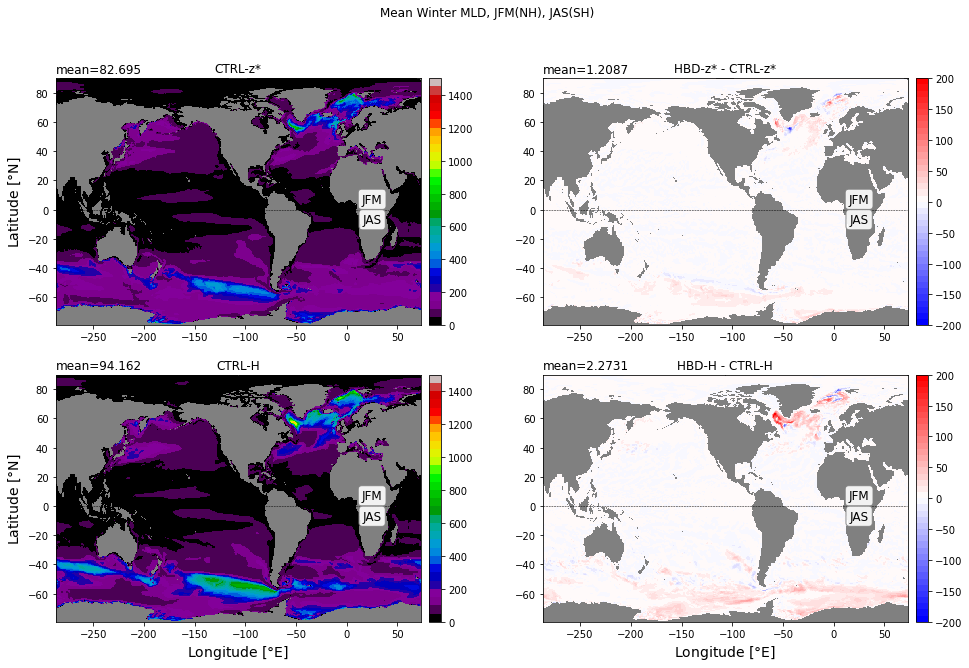

In [12]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
ax1 = ax.flatten()
plt.suptitle('Mean Winter MLD, JFM(NH), JAS(SH)')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_MLD_winter.nc')
  if i == 0:
   C1 = np.ma.masked_invalid(ds.MLD_winter.values)
   xyplot(C1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i], clim=(0,1500), nbins=50,
         colormap=plt.cm.nipy_spectral, extend='neither'); add_labels(ax1[i]); ax1[i].set_xlabel('')
  elif i == 1:
   var = np.ma.masked_invalid(ds.MLD_winter.values) - C1
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i])+ ' - ' + str(labels[0]), 
          axis=ax1[i], clim=(-200,200), nbins=50, centerlabels=True, 
         colormap=plt.cm.bwr, extend='neither'); add_labels(ax1[i])
   ax1[i].set_xlabel(''); ax1[i].set_ylabel('')
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.MLD_winter.values) 
   xyplot(C2, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), 
          axis=ax1[i], clim=(0,1500), colormap=plt.cm.nipy_spectral, extend='neither', 
          centerlabels=True, nbins=50); add_labels(ax1[i])
  elif i == 3:
   var = np.ma.masked_invalid(ds.MLD_winter.values) - C2
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]) + ' - ' + str(labels[i-1]), 
          axis=ax1[i], clim=(-200,200),
         colormap=plt.cm.bwr, extend='neither', centerlabels=True, nbins=50); add_labels(ax1[i])
   ax1[i].set_ylabel('')
#if saveplot:
#    fname = 'PNG/MLD_winter_comparison.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

### Figure 6

gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.baseline.002
Min = 3.4791996479034424, Max = 426.003173828125
gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002
Min = 3.468735456466675, Max = 430.8939208984375
Min = -36.25396728515625, Max = 52.918914794921875
gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.baseline.002
Min = 3.4679126739501953, Max = 538.9260864257812
gmom.e23.GJRAv4.TL319_t061_hycom1_N75.nuopc.HBD.002
Min = 3.4571008682250977, Max = 624.2422485351562
Min = -64.05308532714844, Max = 129.08349609375


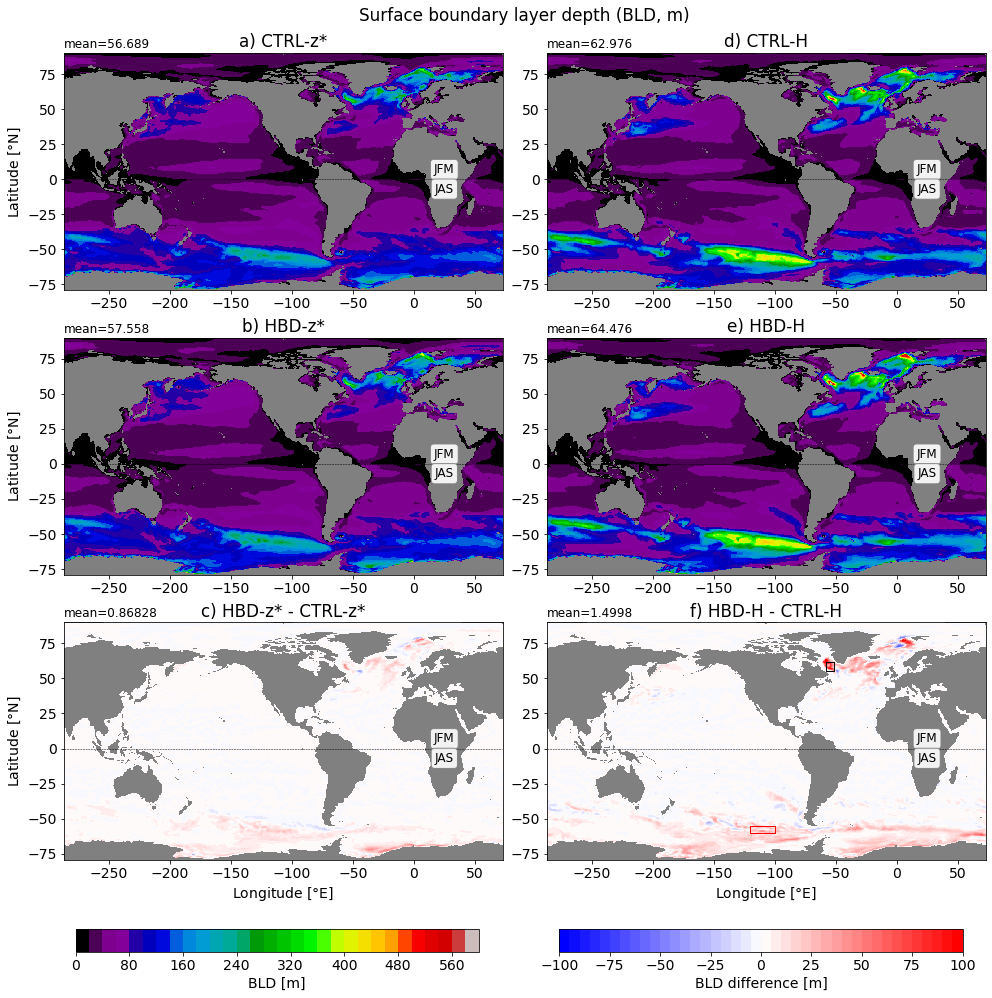

In [13]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
plt.suptitle(r'Surface boundary layer depth (BLD, m)', y=0.94)
ax1 = ax.flatten()
#plt.suptitle('Mean Winter BLD [m], JFM(NH), JAS(SH)')
for i in range(len(exps)):
  print(exps[i])
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_BLD_winter.nc')
  if i == 0:
   C1 = np.ma.masked_invalid(ds.BLD_winter.values)
   cb1 = xyplot(C1, grd.geolon, grd.geolat, grd.area_t, title='a) '+str(labels[i]), axis=ax1[i], clim=(0,600), nbins=50,
         colormap=plt.cm.nipy_spectral, extend='neither',add_cbar=False, annotate=True)
   add_labels(ax1[i]); ax1[i].set_xlabel('')
  elif i == 1:
   var = np.ma.masked_invalid(ds.BLD_winter.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title='b) '+str(labels[i]), 
          axis=ax1[i+1], clim=(0,600), nbins=50, centerlabels=True, 
         colormap=plt.cm.nipy_spectral, extend='neither',add_cbar=False, annotate=True); add_labels(ax1[i+1])
   ax1[i+1].set_xlabel('')

   cb2 = xyplot(var - C1, grd.geolon, grd.geolat, grd.area_t, title='c) '+str(labels[i])+ ' - ' + str(labels[0]), 
          axis=ax1[i+3], clim=(-100,100), nbins=50, centerlabels=True, 
         colormap=plt.cm.bwr, extend='neither',add_cbar=False, annotate=True); add_labels(ax1[i+3])
   #ax1[i+3].set_xlabel(''); ax1[i+3].set_ylabel('')
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.BLD_winter.values) 
   xyplot(C2, grd.geolon, grd.geolat, grd.area_t, title='d) '+str(labels[i]), 
          axis=ax1[i-1], clim=(0,600), colormap=plt.cm.nipy_spectral, extend='neither', 
          centerlabels=True, nbins=50,add_cbar=False, annotate=True); add_labels(ax1[i-1])
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
   var = np.ma.masked_invalid(ds.BLD_winter.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title='e) '+str(labels[i]), 
          axis=ax1[i], clim=(0,600), nbins=50, centerlabels=True, 
         colormap=plt.cm.nipy_spectral, extend='neither',add_cbar=False, annotate=True)
   add_labels(ax1[i])
   ax1[i].set_ylabel(''); ax1[i].set_xlabel('')
   
   # Lab
   ax1[5].plot([-58,-51],[55.,55],'k', lw=1)
   ax1[5].plot([-58,-51],[62.,62],'k', lw=1)
   ax1[5].plot([-58,-58],[55.,62],'k', lw=1)
   ax1[5].plot([-51,-51],[55.,62],'k', lw=1)

   # SO
   ax1[5].plot([-120,-100],[-60.,-60.],'r', lw=1)
   ax1[5].plot([-120,-100],[-55.,-55.],'r', lw=1)
   ax1[5].plot([-120,-120],[-60.,-55.],'r', lw=1)
   ax1[5].plot([-100,-100],[-60.,-55.],'r', lw=1)

   xyplot(var - C2, grd.geolon, grd.geolat, grd.area_t, title='f) '+str(labels[i]) + ' - ' + str(labels[i-1]), 
          axis=ax1[i+2], clim=(-100,100),
         colormap=plt.cm.bwr, extend='neither', centerlabels=True, nbins=50,add_cbar=False, annotate=True)
   add_labels(ax1[i+2])
   ax1[i+2].set_ylabel('')


fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.1)
#left=0.1, right=0.9, bottom=0.1, top=0.9

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'BLD [m]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'BLD difference [m]', fontsize=14)

if saveplot:
    fname = 'PNG/BLD_winter_comparison.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

Min = 1.8568717241287231, Max = 147.84632873535156
Min = 1.871829628944397, Max = 153.7481689453125
Min = 1.8087258338928223, Max = 133.31407165527344
Min = 1.8112049102783203, Max = 136.6561279296875
Min = 10.121842934111557, Max = 372.891142577377


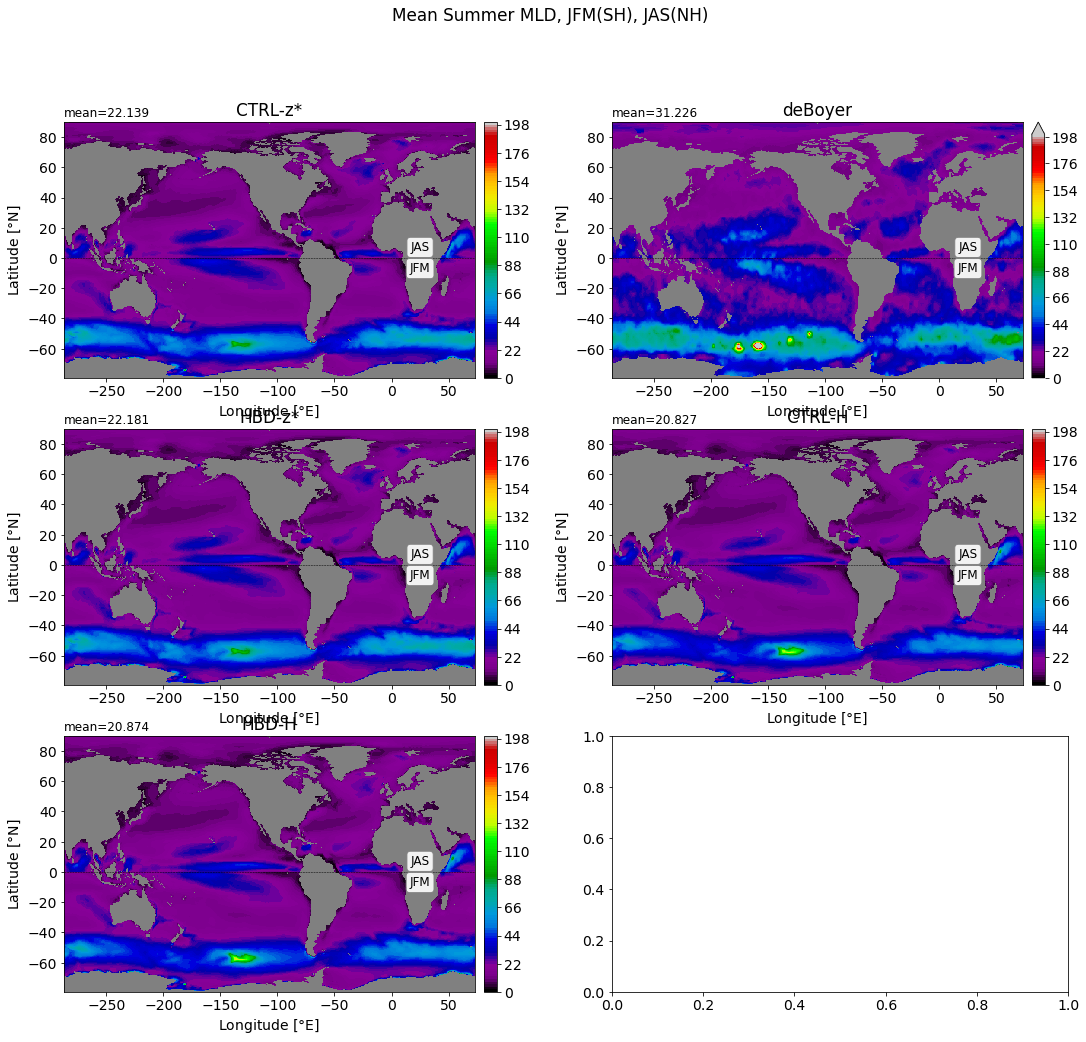

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
ax1 = ax.flatten()
plt.suptitle('Mean Summer MLD, JFM(SH), JAS(NH)')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_MLD_summer.nc')
  if i == 0:
   control = np.ma.masked_invalid(ds.MLD_summer.values)
   xyplot(control, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i], clim=(0,200), nbins=100,
         colormap=plt.cm.nipy_spectral); add_labels(ax1[i], sh='JFM', nh='JAS')
  else:
   var = np.ma.masked_invalid(ds.MLD_summer.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i+1], clim=(0,200), nbins=100,
         colormap=plt.cm.nipy_spectral); add_labels(ax1[i+1], sh='JFM', nh='JAS')

xyplot(obs_summer, grd.geolon, grd.geolat, grd.area_t, title='deBoyer', axis=ax1[1], clim=(0,200), nbins=100,
       colormap=plt.cm.nipy_spectral); add_labels(ax1[1], sh='JFM', nh='JAS')
#if saveplot:
#    fname = 'PNG/MLD_summer.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

Min = 1.8568717241287231, Max = 147.84632873535156
Min = -8.950515747070312, Max = 7.077861785888672
Min = 1.8087258338928223, Max = 133.31407165527344
Min = -19.939002990722656, Max = 16.207069396972656


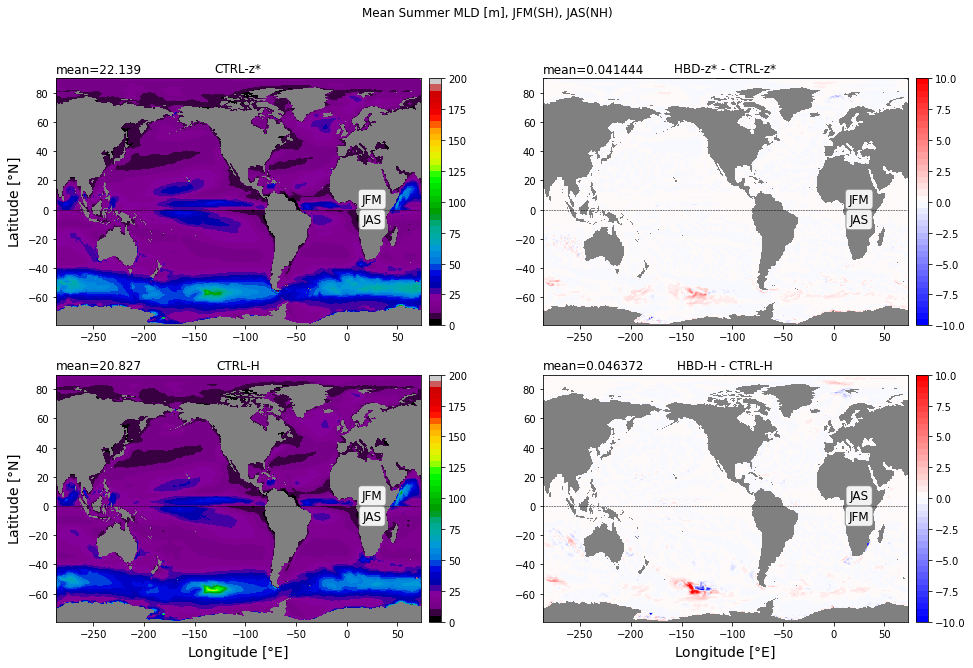

In [15]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
ax1 = ax.flatten()
plt.suptitle('Mean Summer MLD [m], JFM(SH), JAS(NH)')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_MLD_summer.nc')
  if i == 0:
   C1 = np.ma.masked_invalid(ds.MLD_summer.values)
   xyplot(C1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i], clim=(0,200), nbins=50,
         colormap=plt.cm.nipy_spectral, extend='neither'); add_labels(ax1[i]); ax1[i].set_xlabel('')
  elif i == 1:
   var = np.ma.masked_invalid(ds.MLD_summer.values) - C1
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i])+ ' - ' + str(labels[0]), 
          axis=ax1[i], clim=(-10,10), nbins=50, centerlabels=True, 
         colormap=plt.cm.bwr, extend='neither'); add_labels(ax1[i])
   ax1[i].set_xlabel(''); ax1[i].set_ylabel('')
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.MLD_summer.values) 
   xyplot(C2, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), 
          axis=ax1[i], clim=(0,200), colormap=plt.cm.nipy_spectral, extend='neither', 
          centerlabels=True, nbins=50); add_labels(ax1[i])
  elif i == 3:
   var = np.ma.masked_invalid(ds.MLD_summer.values) - C2
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]) + ' - ' + str(labels[i-1]), 
          axis=ax1[i], clim=(-10,10),
         colormap=plt.cm.bwr, extend='neither', centerlabels=True, nbins=50); add_labels(ax1[i],nh='JAS', sh='JFM')
   ax1[i].set_ylabel('')
#if saveplot:
#    fname = 'PNG/MLD_summer_comparison.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

Min = 3.1724636554718018, Max = 72.7288818359375
Min = 3.184809446334839, Max = 73.09436798095703
Min = -1.6254520416259766, Max = 2.7669410705566406
Min = 3.143122434616089, Max = 102.70825958251953
Min = 3.1444265842437744, Max = 102.9807357788086
Min = -4.481459617614746, Max = 5.525409698486328


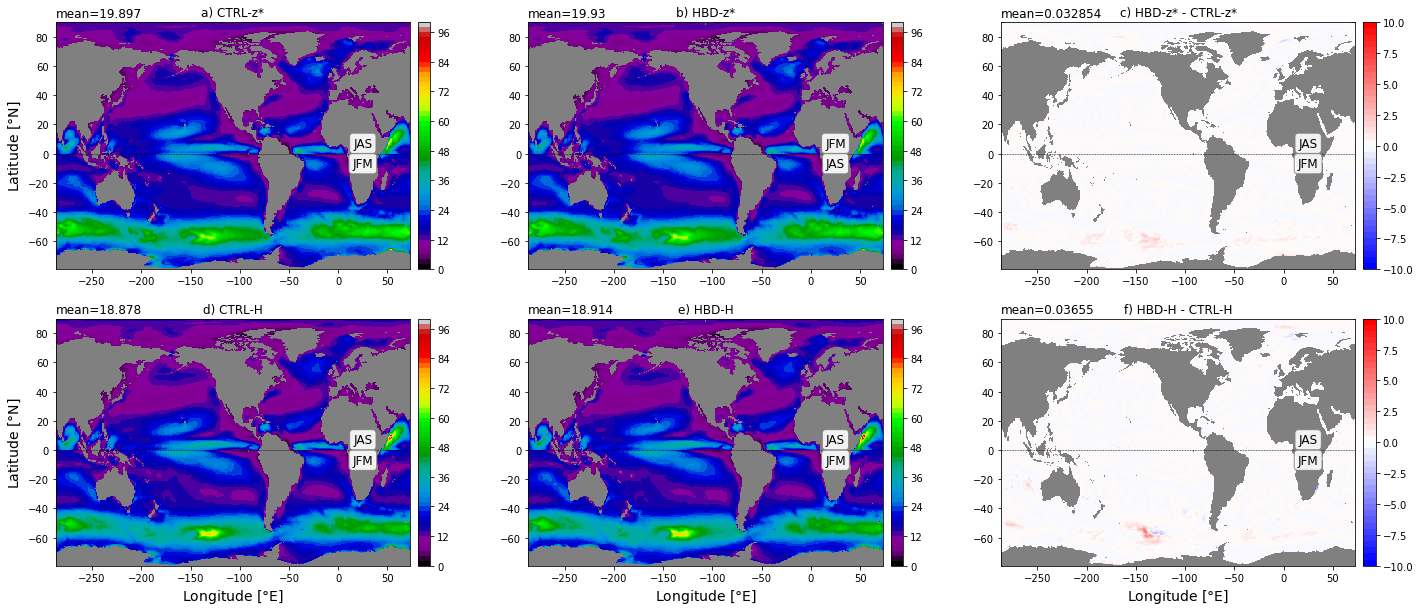

In [16]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,10))
ax1 = ax.flatten()
#plt.suptitle('Mean Summer BLD [m], JAS(NH), JFM(SH)')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_BLD_summer.nc')
  if i == 0:
   C1 = np.ma.masked_invalid(ds.BLD_summer.values)
   xyplot(C1, grd.geolon, grd.geolat, grd.area_t, title='a) '+str(labels[i]), axis=ax1[i], clim=(0,100), nbins=50,
         colormap=plt.cm.nipy_spectral, extend='neither'); add_labels(ax1[i],nh='JAS', sh='JFM'); ax1[i].set_xlabel('')
  elif i == 1:
   var = np.ma.masked_invalid(ds.BLD_summer.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title='b) '+str(labels[i]), 
          axis=ax1[i], clim=(0,100), nbins=50, centerlabels=True, 
         colormap=plt.cm.nipy_spectral, extend='neither'); add_labels(ax1[i])
   ax1[i].set_xlabel(''); ax1[i].set_ylabel('')

   xyplot(var - C1, grd.geolon, grd.geolat, grd.area_t, title='c) '+str(labels[i])+ ' - ' + str(labels[0]), 
          axis=ax1[i+1], clim=(-10,10), nbins=50, centerlabels=True, 
         colormap=plt.cm.bwr, extend='neither'); add_labels(ax1[i+1],nh='JAS', sh='JFM')
   ax1[i+1].set_xlabel(''); ax1[i+1].set_ylabel('')
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.BLD_summer.values) 
   xyplot(C2, grd.geolon, grd.geolat, grd.area_t, title='d) '+str(labels[i]), 
          axis=ax1[i+1], clim=(0,100), colormap=plt.cm.nipy_spectral, extend='neither', 
          centerlabels=True, nbins=50); add_labels(ax1[i+1],nh='JAS', sh='JFM')
  elif i == 3:
   var = np.ma.masked_invalid(ds.BLD_summer.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title='e) '+str(labels[i]), 
          axis=ax1[i+1], clim=(0,100), nbins=50, centerlabels=True, 
         colormap=plt.cm.nipy_spectral, extend='neither'); add_labels(ax1[i+1],nh='JAS', sh='JFM')
   ax1[i+1].set_ylabel('')

   xyplot(var - C2, grd.geolon, grd.geolat, grd.area_t, title='f) '+str(labels[i]) + ' - ' + str(labels[i-1]), 
          axis=ax1[i+2], clim=(-10,10),
         colormap=plt.cm.bwr, extend='neither', centerlabels=True, nbins=50); add_labels(ax1[i+2],nh='JAS', sh='JFM')
   ax1[i+2].set_ylabel('')

#if saveplot:
#    fname = 'PNG/BLD_summer_comparison.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

Min = 3.1724636554718018, Max = 72.7288818359375
Min = -1.6254520416259766, Max = 2.7669410705566406
Min = 3.143122434616089, Max = 102.70825958251953
Min = -4.481459617614746, Max = 5.525409698486328


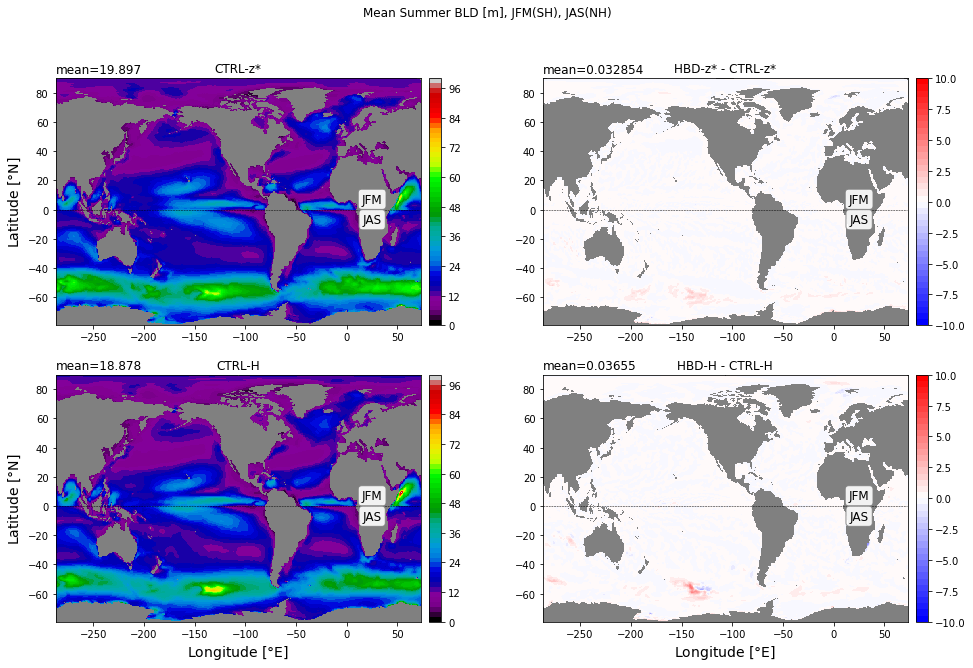

In [17]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
ax1 = ax.flatten()
plt.suptitle('Mean Summer BLD [m], JFM(SH), JAS(NH)')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_BLD_summer.nc')
  if i == 0:
   C1 = np.ma.masked_invalid(ds.BLD_summer.values)
   xyplot(C1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i], clim=(0,100), nbins=50,
         colormap=plt.cm.nipy_spectral, extend='neither'); add_labels(ax1[i]); ax1[i].set_xlabel('')
  elif i == 1:
   var = np.ma.masked_invalid(ds.BLD_summer.values) - C1
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i])+ ' - ' + str(labels[0]), 
          axis=ax1[i], clim=(-10,10), nbins=50, centerlabels=True, 
         colormap=plt.cm.bwr, extend='neither'); add_labels(ax1[i])
   ax1[i].set_xlabel(''); ax1[i].set_ylabel('')
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.BLD_summer.values) 
   xyplot(C2, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), 
          axis=ax1[i], clim=(0,100), colormap=plt.cm.nipy_spectral, extend='neither', 
          centerlabels=True, nbins=50); add_labels(ax1[i])
  elif i == 3:
   var = np.ma.masked_invalid(ds.BLD_summer.values) - C2
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]) + ' - ' + str(labels[i-1]), 
          axis=ax1[i], clim=(-10,10),
         colormap=plt.cm.bwr, extend='neither', centerlabels=True, nbins=50); add_labels(ax1[i])
   ax1[i].set_ylabel('')
#if saveplot:
#    fname = 'PNG/BLD_summer_comparison.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

###  1.3 Poleward Heat Transport

In [81]:
def get_heat_transport_obs():
  import netCDF4
  """Plots model vs obs poleward heat transport for the global, Pacific and Atlantic basins"""
  # Load Observations
  fObs = netCDF4.Dataset('/glade/work/gmarques/cesm/datasets/Trenberth_and_Caron_Heat_Transport.nc')
  #Trenberth and Caron
  yobs = fObs.variables['ylat'][:]
  NCEP = {}; NCEP['Global'] = fObs.variables['OTn']
  NCEP['Atlantic'] = fObs.variables['ATLn'][:]; NCEP['IndoPac'] = fObs.variables['INDPACn'][:]
  ECMWF = {}; ECMWF['Global'] = fObs.variables['OTe'][:]
  ECMWF['Atlantic'] = fObs.variables['ATLe'][:]; ECMWF['IndoPac'] = fObs.variables['INDPACe'][:]

  #G and W
  Global = {}
  Global['lat'] = np.array([-30., -19., 24., 47.])
  Global['trans'] = np.array([-0.6, -0.8, 1.8, 0.6])
  Global['err'] = np.array([0.3, 0.6, 0.3, 0.1])

  Atlantic = {}
  Atlantic['lat'] = np.array([-45., -30., -19., -11., -4.5, 7.5, 24., 47.])
  Atlantic['trans'] = np.array([0.66, 0.35, 0.77, 0.9, 1., 1.26, 1.27, 0.6])
  Atlantic['err'] = np.array([0.12, 0.15, 0.2, 0.4, 0.55, 0.31, 0.15, 0.09])

  IndoPac = {}
  IndoPac['lat'] = np.array([-30., -18., 24., 47.])
  IndoPac['trans'] = np.array([-0.9, -1.6, 0.52, 0.])
  IndoPac['err'] = np.array([0.3, 0.6, 0.2, 0.05,])

  GandW = {}
  GandW['Global'] = Global
  GandW['Atlantic'] = Atlantic
  GandW['IndoPac'] = IndoPac
  return NCEP, ECMWF, GandW, yobs

NCEP, ECMWF, GandW, yobs = get_heat_transport_obs()
from mom6_tools.poleward_heat_transport import annotateObs, plotGandW, plotHeatTrans, heatTrans

In [82]:
def get_adv_diff(ds):
  # create a ndarray subclass
  class C(np.ndarray): pass

  varName = 'T_ady_2d'
  if varName in ds.variables:
    tmp = np.ma.masked_invalid(ds[varName].values)
    tmp = tmp[:].filled(0.)
    advective = tmp.view(C)
    advective.units = 'W'
  else:
    raise Exception('Could not find "T_ady_2d"')

  varName = 'T_diffy_2d'
  if varName in ds.variables:
    tmp = np.ma.masked_invalid(ds[varName].values)
    tmp = tmp[:].filled(0.)
    diffusive = tmp.view(C)
    diffusive.units = 'W'
  else:
    diffusive = None
    warnings.warn('Diffusive temperature term not found. This will result in an underestimation of the heat transport.')

  varName = 'T_hbd_diffy'
  if varName in ds.variables:
    tmp = np.ma.masked_invalid(ds_sel[varName].sum('z_l').values)
    tmp = tmp[:].filled(0.)
    diffusive = diffusive + tmp.view(C)
  else:
    warnings.warn('Horizontal boundary mixing term not found. This will result in an underestimation of the heat transport.')
    
  return advective, diffusive

<center> <font size="4">Global Heat Transport</font>

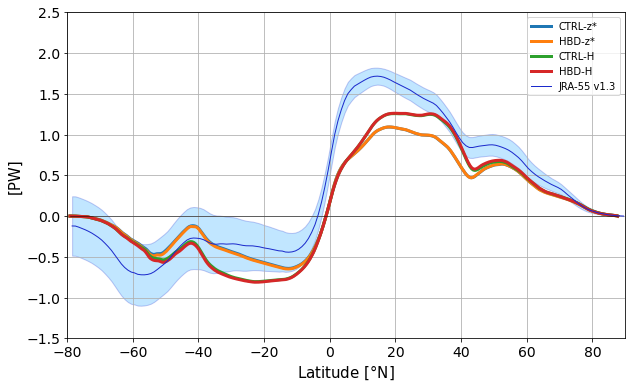

In [83]:
# Global Heat Transport
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,6))
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_heat_transport.nc')
  adv, diff = get_adv_diff(ds)
  HT = heatTrans(adv,diff); y = ds.yq
  plt.plot(y, HT, linewidth=3,label=labels[i]); 
    
plt.xlim(-80,90); plt.ylim(-2.5,3.0); plt.grid(True); 
plt.plot(y, y*0., 'k', linewidth=0.5)
#plt.plot(yobs,NCEP['Global'],'k--',linewidth=0.5,label='NCEP'); 
#plt.plot(yobs,ECMWF['Global'],'k.',linewidth=0.5,label='ECMWF')
#plotGandW(GandW['Global']['lat'],GandW['Global']['trans'],GandW['Global']['err'])
pop = xr.open_dataset('/glade/u/home/bryan/MOM6-modeloutputanalysis/MHT_mean.g210.GIAF_JRA.v13.gx1v7.01.nc')
jra = xr.open_dataset('/glade/work/gmarques/cesm/datasets/Heat_transport/jra55fcst_v1_3_annual_1x1/nht_jra55do_v1_3.nc')
#plt.plot(pop.lat_aux_grid.values,pop.MHT_global.values,'orange',linewidth=3,label='POP')
jra_mean_global = jra.nht[:,0,:].mean('time').values
jra_std_global = jra.nht[:,0,:].std('time').values
plt.plot(jra.lat, jra_mean_global,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_global-jra_std_global, jra_mean_global+jra_std_global,
    alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.legend(loc=0,fontsize=10)
plt.ylim(-1.5,2.5)
if saveplot:
    fname = 'PNG/global_poleward_heat_transport.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

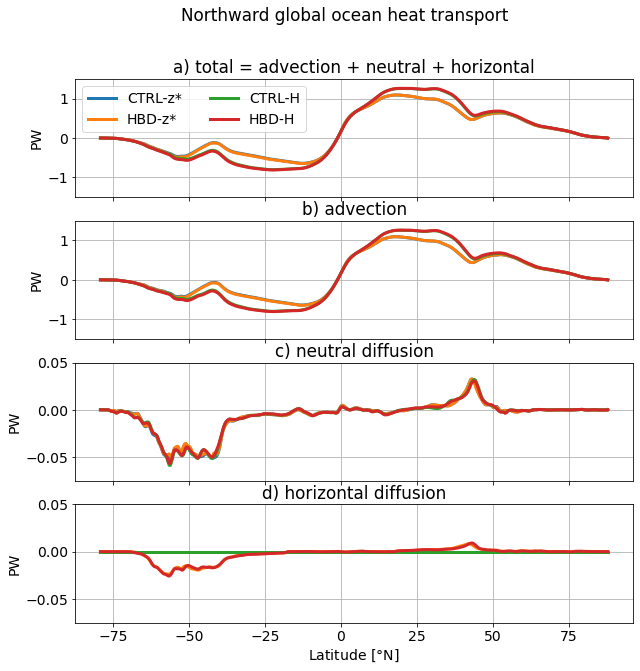

In [84]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,10), sharex=True)
plt.suptitle('Northward global ocean heat transport')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_heat_transport.nc')
  total = (ds.T_ady_2d + ds.T_diffy_2d +
          ds.T_lbd_diffy_2d) 
  (total.sum(dim='xh')* 1.e-15).plot(ax=ax[0], lw=3,label=labels[i]); 
  (ds.T_ady_2d.sum(dim='xh')* 1.e-15).plot(ax=ax[1], lw=3,label=labels[i]); 
  (ds.T_diffy_2d.sum(dim='xh') * 1.e-15).plot(ax=ax[2], lw=3); 
  (ds.T_hbd_diffy_2d.sum(dim='xh') * 1.e-15).plot(ax=ax[3], lw=3); 

ax[0].legend(ncol=2)
ax[0].grid(); ax[1].grid();ax[2].grid(); ax[3].grid()
ax[0].set_ylim(-1.5, 1.5); ax[1].set_ylim(-1.5, 1.5)
ax[2].set_ylim(-0.075, 0.05); ax[3].set_ylim(-0.075, 0.05)
ax[0].set_ylabel('PW');ax[1].set_ylabel('PW');ax[2].set_ylabel('PW'); ax[3].set_ylabel('PW')
ax[0].set_xlabel('');ax[1].set_xlabel(''); ax[2].set_xlabel(''); ax[3].set_xlabel('Latitude [$\degree$N]')

ax[0].set_title('a) total = advection + neutral + horizontal')
ax[1].set_title('b) advection')
ax[2].set_title('c) neutral diffusion');
ax[3].set_title('d) horizontal diffusion');
if saveplot:
    fname = 'PNG/global_poleward_heat_transport_by_components.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

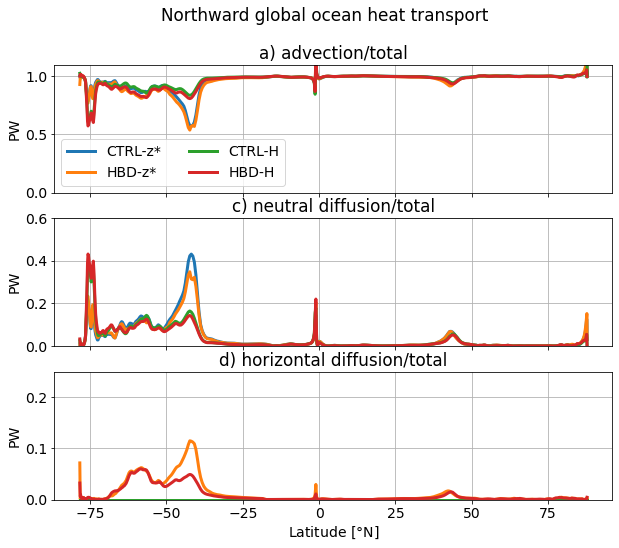

In [85]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,8), sharex=True)
plt.suptitle('Northward global ocean heat transport')
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_heat_transport.nc')
  total = (ds.T_ady_2d + ds.T_diffy_2d +
          ds.T_hbd_diffy_2d) 
  (np.abs(ds.T_ady_2d.sum(dim='xh'))/np.abs(total.sum(dim='xh'))).plot(ax=ax[0], lw=3,label=labels[i]); 
  (np.abs(ds.T_diffy_2d.sum(dim='xh'))/np.abs(total.sum(dim='xh'))).plot(ax=ax[1], lw=3); 
  (np.abs(ds.T_hbd_diffy_2d.sum(dim='xh'))/np.abs(total.sum(dim='xh'))).plot(ax=ax[2], lw=3); 

ax[0].legend(ncol=2)
ax[0].grid(); ax[1].grid();ax[2].grid()
ax[0].set_ylim(0, 1.1); ax[1].set_ylim(0, 0.6); ax[2].set_ylim(0, 0.25)
ax[0].set_ylabel('PW');ax[1].set_ylabel('PW');ax[2].set_ylabel('PW')
ax[0].set_xlabel('');ax[1].set_xlabel('');  ax[2].set_xlabel('Latitude [$\degree$N]')

ax[0].set_title('a) advection/total')
ax[1].set_title('c) neutral diffusion/total');
ax[2].set_title('d) horizontal diffusion/total');

In [23]:
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth)

11.16428 64.78855 [391, 434]


<center> <font size="4">Atlantic Heat Transport</font>

(-40.0, 90.0)

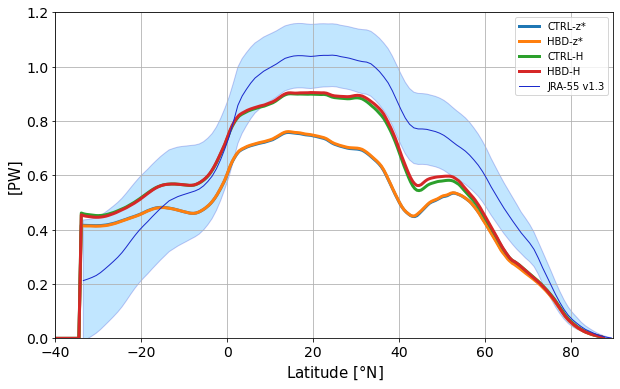

In [24]:
# Atlantic Heat Transport
m = 0*basin_code; m[(basin_code==2) | (basin_code==4) | (basin_code==6) | (basin_code==7) | (basin_code==8)] = 1
plt.figure(figsize=(10,6))
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_heat_transport.nc')
  adv, diff = get_adv_diff(ds)
  HT = heatTrans(adv,diff, vmask=m*np.roll(m,-1,axis=-2)); y = ds.yq
  plt.plot(y, HT, linewidth=3,label=labels[i])
    
plt.xlim(-80,90); plt.ylim(-0.1,2.0)
plt.grid(True); plt.plot(y, y*0., 'k', linewidth=0.5)
#plt.plot(yobs,NCEP['Atlantic'],'k--',linewidth=0.5,label='NCEP'); 
#plt.plot(yobs,ECMWF['Atlantic'],'k.',linewidth=0.5,label='ECMWF'); 
#plotGandW(GandW['Atlantic']['lat'],GandW['Atlantic']['trans'],GandW['Atlantic']['err'])

#plt.plot(pop.lat_aux_grid.values,pop.MHT_atl.values,'orange',linewidth=3,label='POP')
jra_mean_atl = jra.nht[:,1,:].mean('time').values
jra_std_atl = jra.nht[:,1,:].std('time').values
plt.plot(jra.lat, jra_mean_atl,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_atl-jra_std_atl, jra_mean_atl+jra_std_atl,
    alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.ylabel('[PW]',fontsize=15); plt.legend(loc=0,fontsize=10)
plt.ylim(0,1.2)
plt.xlim(-40,90.)

#if saveplot:
#    fname = 'PNG/atlantic_poleward_heat_transport.png'
#    plt.savefig(fname, bbox_inches='tight',dpi=300)

### 1.6 Horizontal Mean bias versus time

In [25]:
start_date ='0001-01-01'
end_date   ='0062-01-01'

In [26]:
i=0
ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_thetao_drift.nc')
ds.region

<xarray.DataArray 'region' (region: 11)>
array(['Global', 'MedSea', 'BalticSea', 'HudsonBay', 'Arctic', 'PacificOcean',
       'AtlanticOcean', 'IndianOcean', 'SouthernOcean', 'LabSea', 'BaffinBay'],
      dtype=object)
Coordinates:
  * region   (region) object 'Global' 'MedSea' ... 'LabSea' 'BaffinBay'

#### Global

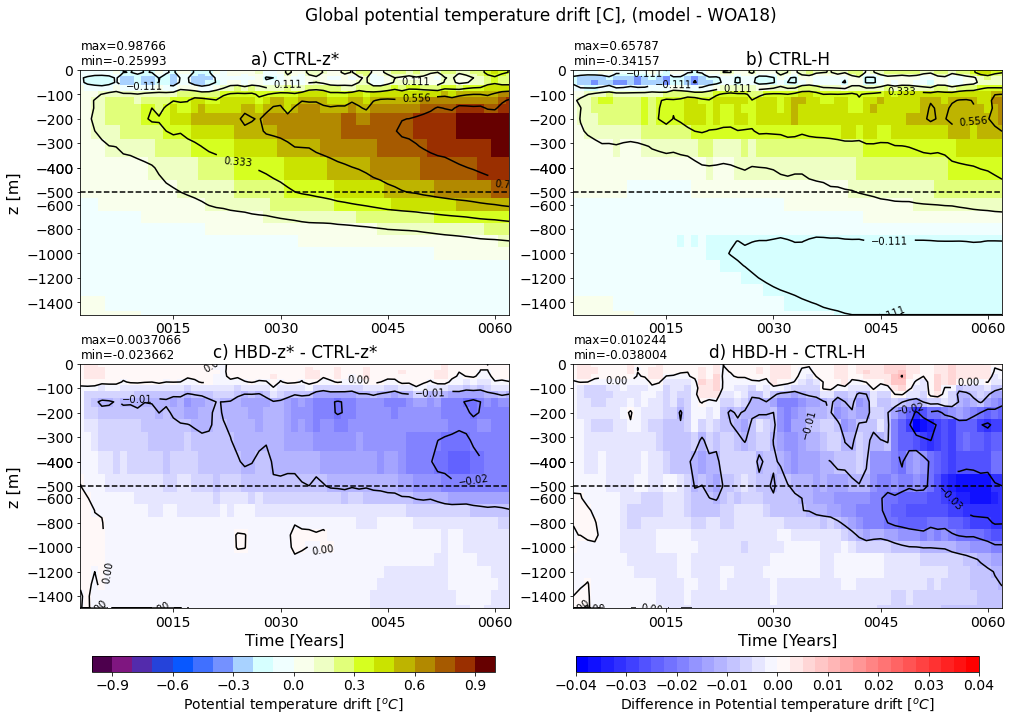

In [61]:
%matplotlib inline

# only 4 plots

reg = 'Global'

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,11))
plt.suptitle(reg+' potential temperature drift [C], (model - WOA18)', y=0.96)
ax1 = ax.flatten()

clim=(-1, 1); clevs = np.linspace(clim[0],clim[1],10)
diff_levs = np.arange(-0.04,0.05,0.01) #np.linspace(-0.04,0.04,20)

for i in range(len(exps)):
  splitscale =  [0., -500., -1500]
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_thetao_drift.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
  
    
  if i == 0:
    C1 = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    cb1 = ztplot(C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='a) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_xlabel('')
  elif i == 1:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    #cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
    #    axis=ax1[i+1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
    #    autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    #ax1[i+1].set_xlabel('');
    
    cb2 = ztplot(dummy - C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+1], title='c) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.04, 0.04), clevs=diff_levs, add_cbar=False);
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
   cb1 = ztplot(C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i-1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    #cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
    #    axis=ax1[i], title='e) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
    #    autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    #ax1[i].set_ylabel(''); ax1[i].set_xlabel('')

    cb2 = ztplot(dummy - C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='d) '+str(labels[i])+ ' - ' + str(labels[i-1]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.04, 0.04), clevs=diff_levs, add_cbar=False);
    ax1[i].set_ylabel('')
    
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.88, wspace=0.15)

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'Potential temperature drift [$^oC$]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'Difference in Potential temperature drift [$^oC$]', fontsize=14)

if saveplot:
  fname = 'PNG/{}_temp_bias.png'.format(reg)
  plt.savefig(fname, bbox_inches='tight',dpi=300)

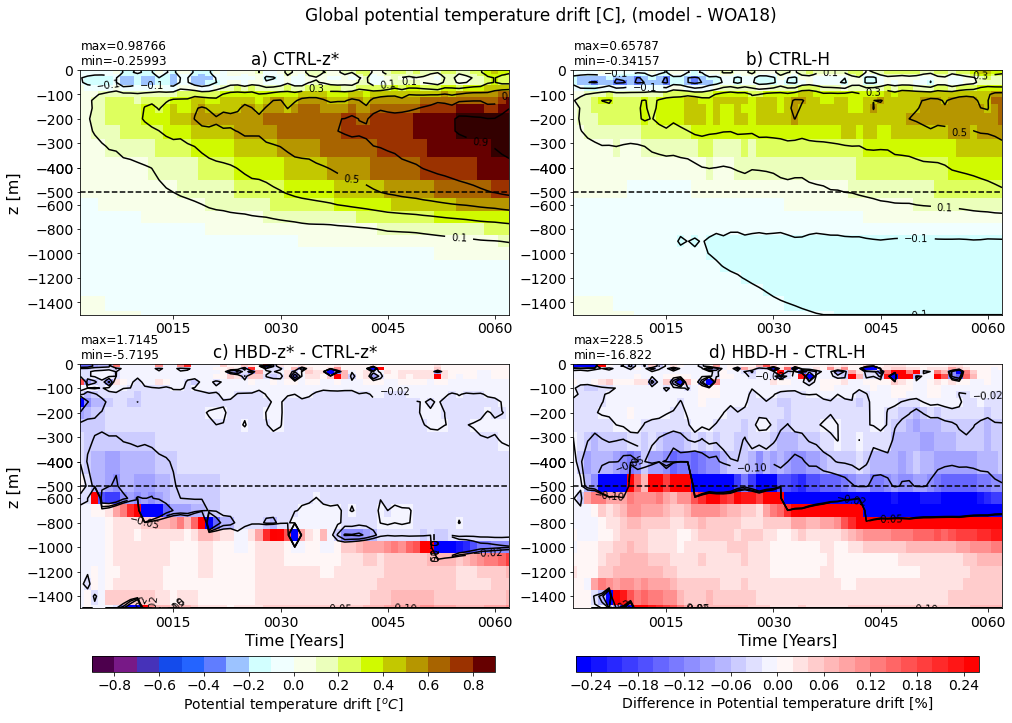

In [53]:
%matplotlib inline

# only 4 plots

reg = 'Global'

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,11))
plt.suptitle(reg+' potential temperature drift [C], (model - WOA18)', y=0.96)
ax1 = ax.flatten()

clim=(-0.9, 0.9); clevs = np.linspace(clim[0],clim[1],10)
diff_levs = [-0.1, -0.05, -0.02]

for i in range(len(exps)):
  splitscale =  [0., -500., -1500]
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_thetao_drift.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
  
    
  if i == 0:
    C1 = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    cb1 = ztplot(C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='a) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_xlabel('')
  elif i == 1:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    #cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
    #    axis=ax1[i+1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
    #    autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    #ax1[i+1].set_xlabel('');
    
    cb2 = ztplot(((dummy-C1))/(C1), ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+1], title='c) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.25, 0.25), clevs=diff_levs, add_cbar=False);
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
   cb1 = ztplot(C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i-1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)

    cb2 = ztplot(((dummy-C2))/(C2), ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='d) '+str(labels[i])+ ' - ' + str(labels[i-1]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.25, 0.25), clevs=diff_levs, add_cbar=False);
    ax1[i].set_ylabel('')
    
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.88, wspace=0.15)

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'Potential temperature drift [$^oC$]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'Difference in Potential temperature drift [%]', fontsize=14)

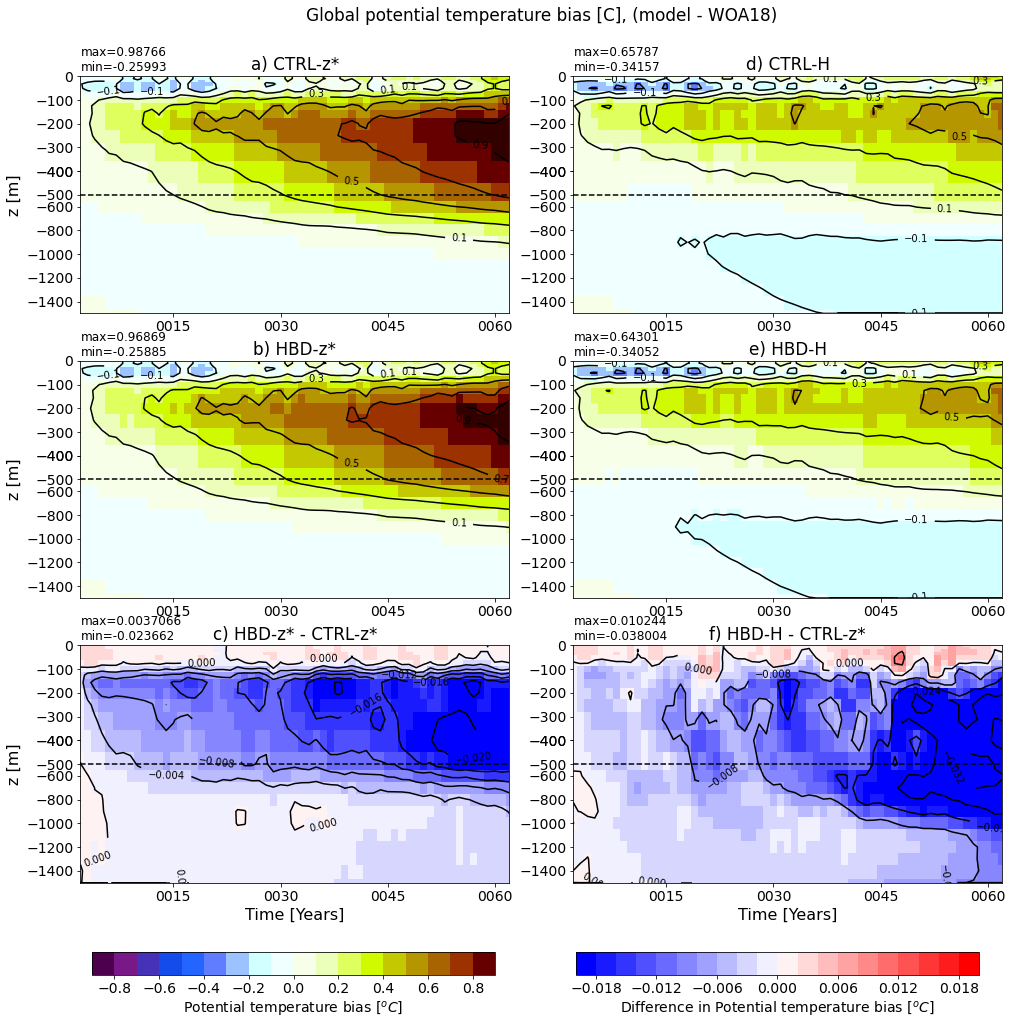

In [30]:
%matplotlib inline

reg = 'Global'

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
plt.suptitle(reg+' potential temperature bias [C], (model - WOA18)', y=0.96)
ax1 = ax.flatten()

for i in range(len(exps)):
  splitscale =  [0., -500., -1500]
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_thetao_drift.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
  clim=(-0.9, 0.9); clevs = np.linspace(clim[0],clim[1],10)
    
  if i == 0:
    C1 = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    cb1 = ztplot(C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='a) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_xlabel('')
  elif i == 1:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i+1].set_xlabel('');
    
    cb2 = ztplot(dummy - C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+3], title='c) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.02, 0.02), add_cbar=False);
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
   cb1 = ztplot(C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i-1], title='d) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).thetao_drift.values)
    cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='e) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_ylabel(''); ax1[i].set_xlabel('')

    cb2 = ztplot(dummy - C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+2], title='f) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.02, 0.02), add_cbar=False);
    ax1[i+2].set_ylabel('')
    
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.15)

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'Potential temperature bias [$^oC$]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'Difference in Potential temperature bias [$^oC$]', fontsize=14)

#if saveplot:
#  fname = 'PNG/{}_temp_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

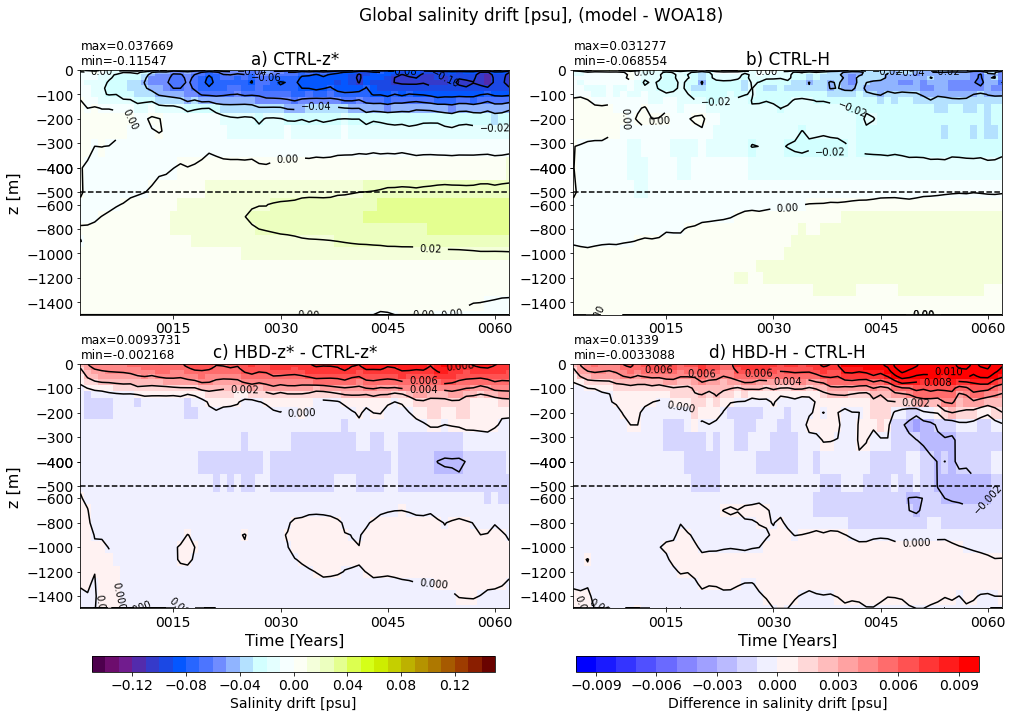

In [76]:
%matplotlib inline

# 4 panels

reg = 'Global'

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,11))
plt.suptitle(reg+' salinity drift [psu], (model - WOA18)', y=0.96)
ax1 = ax.flatten()

clim=(-0.15, 0.15); clevs = np.arange(-0.14,0.14,0.02) #np.linspace(clim[0],clim[1],10)
diff_levs = np.arange(-0.02,0.02,0.002) #np.linspace(-0.003,0.02,10)

    
for i in range(len(exps)):
  splitscale =  [0., -500., -1500]
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_so_drift.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    
  if i == 0:
    C1 = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    cb1 = ztplot(C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='a) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_xlabel('')
  elif i == 1:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    #cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
    #    axis=ax1[i+1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
    #    autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    #ax1[i+1].set_xlabel('');
    
    cb2 = ztplot(dummy - C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+1], title='c) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.01, 0.01), clevs=diff_levs, add_cbar=False);
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
   cb1 = ztplot(C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i-1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    #cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
    #    axis=ax1[i], title='e) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
    #    autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    #ax1[i].set_ylabel(''); ax1[i].set_xlabel('')

    cb2 = ztplot(dummy - C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='d) '+str(labels[i])+ ' - ' + str(labels[i-1]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.01, 0.01), clevs=diff_levs, add_cbar=False);
    ax1[i].set_ylabel('')
    
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.88, wspace=0.15)

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'Salinity drift [psu]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'Difference in salinity drift [psu]', fontsize=14)

if saveplot:
  fname = 'PNG/{}_salt_bias.png'.format(reg)
  plt.savefig(fname, bbox_inches='tight',dpi=300)

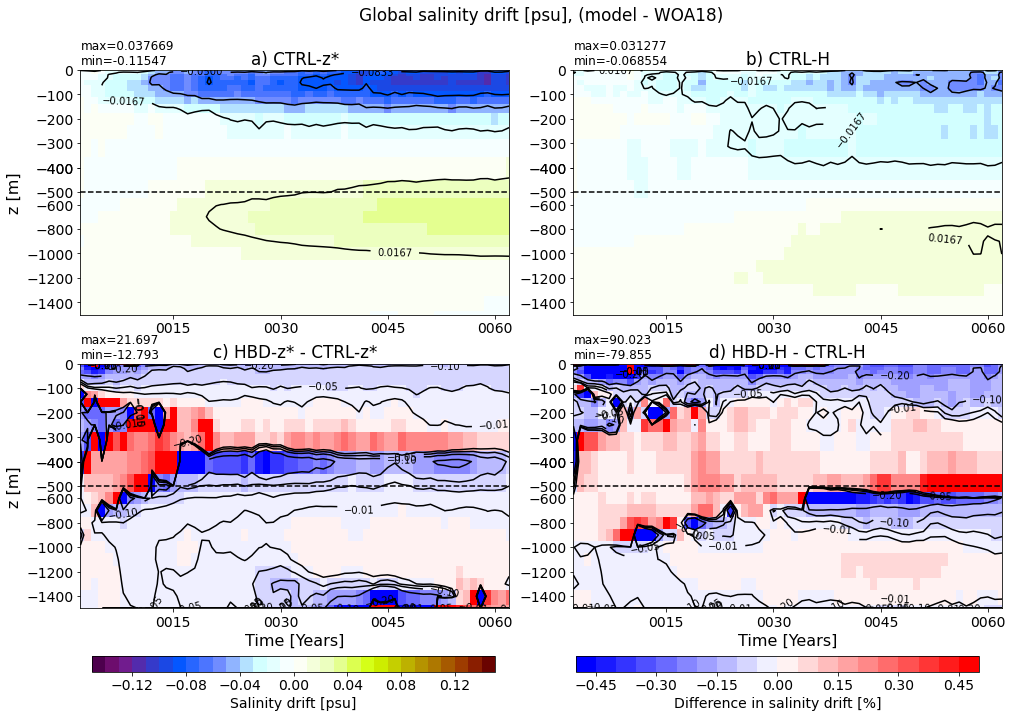

In [73]:
%matplotlib inline

# 4 panels

reg = 'Global'

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,11))
plt.suptitle(reg+' salinity drift [psu], (model - WOA18)', y=0.96)
ax1 = ax.flatten()

clim=(-0.15, 0.15); clevs = np.linspace(clim[0],clim[1],10)
diff_levs = [-0.2,  -0.1, -0.05,-0.01]

    
for i in range(len(exps)):
  splitscale =  [0., -500., -1500]
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_so_drift.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    
  if i == 0:
    C1 = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    cb1 = ztplot(C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='a) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_xlabel('')
  elif i == 1:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    #cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
    #    axis=ax1[i+1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
    #    autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    #ax1[i+1].set_xlabel('');
    
    cb2 = ztplot(((dummy-C1))/(C1), ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+1], title='c) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.5, 0.5), clevs=diff_levs, add_cbar=False);
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
   cb1 = ztplot(C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i-1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='z',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    #cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
    #    axis=ax1[i], title='e) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
    #    autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    #ax1[i].set_ylabel(''); ax1[i].set_xlabel('')

    cb2 = ztplot(((dummy-C2))/(C2), ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='d) '+str(labels[i])+ ' - ' + str(labels[i-1]), extend='both', colormap=plt.cm.bwr, 
        zlabel='z', autocenter=True, tunits='Years', show=False, clim=(-0.5, 0.5), clevs=diff_levs, add_cbar=False);
    ax1[i].set_ylabel('')
    
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.88, wspace=0.15)

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'Salinity drift [psu]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'Difference in salinity drift [%]', fontsize=14)

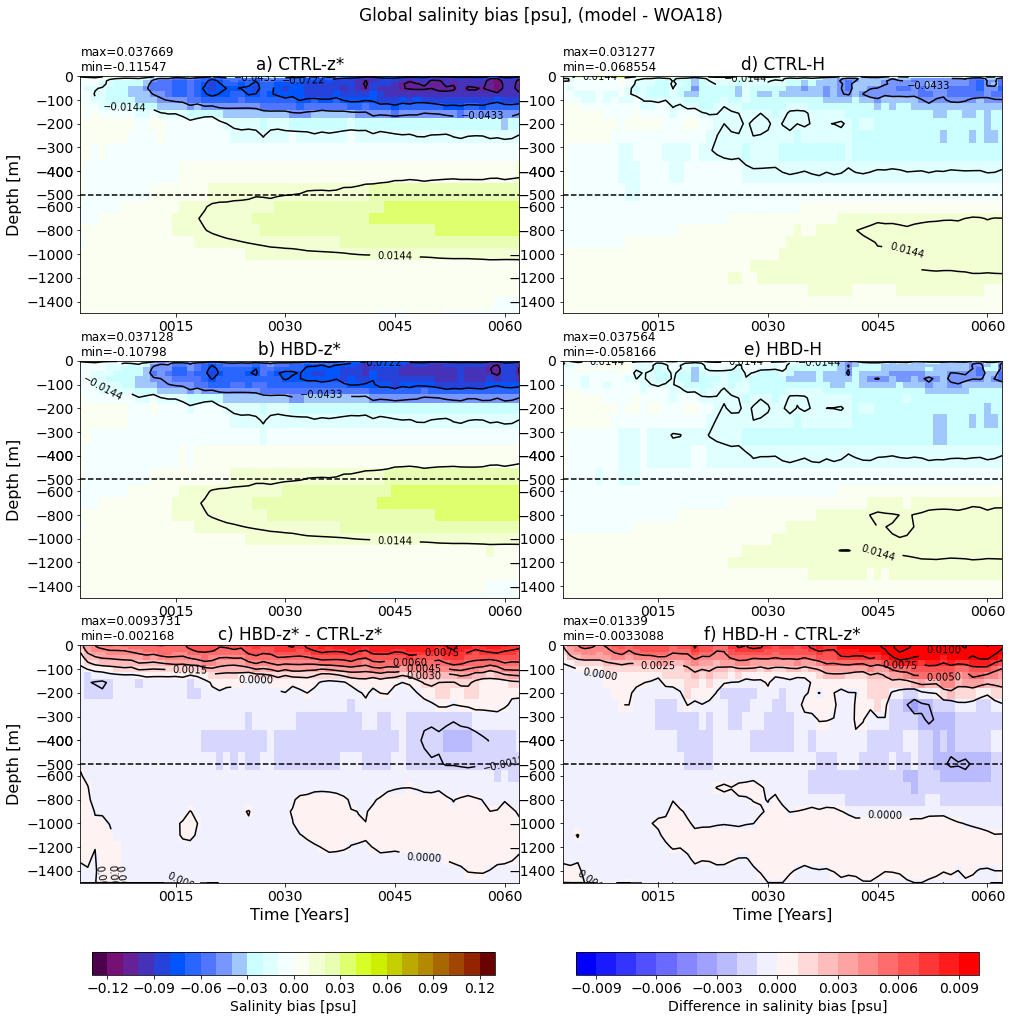

In [80]:
%matplotlib inline

reg = 'Global'

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
plt.suptitle(reg+' salinity bias [psu], (model - WOA18)', y=0.96)
ax1 = ax.flatten()

for i in range(len(exps)):
  splitscale =  [0., -500., -1500]
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_so_drift.nc').sel(time=slice(start_date, end_date))

  dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
  clim=(-0.13, 0.13); clevs = np.linspace(clim[0],clim[1],10)
    
  if i == 0:
    C1 = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    cb1 = ztplot(C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='a) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_xlabel('')
  elif i == 1:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+1], title='b) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i+1].set_xlabel('');
    
    cb2 = ztplot(dummy - C1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+3], title='c) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='Depth', autocenter=True, tunits='Years', show=False, clim=(-0.01, 0.01), add_cbar=False);
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
   cb1 = ztplot(C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i-1], title='d) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
    dummy = np.ma.masked_invalid(ds.sel(region=reg).so_drift.values)
    cb1 = ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i], title='e) '+labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
        autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs, add_cbar=False);
    ax1[i].set_ylabel(''); ax1[i].set_xlabel('')

    cb2 = ztplot(dummy - C2, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
        axis=ax1[i+2], title='f) '+str(labels[i])+ ' - ' + str(labels[0]), extend='both', colormap=plt.cm.bwr, 
        zlabel='Depth', autocenter=True, tunits='Years', show=False, clim=(-0.01, 0.01), add_cbar=False);
    ax1[i+2].set_ylabel('')
    
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.1)

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'Salinity bias [psu]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'Difference in salinity bias [psu]', fontsize=14)

#if saveplot:
#  fname = 'PNG/{}_salt_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

#### Atlantic

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'AtlanticOcean'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle(reg+', Potential Temperature drift [C], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_temp_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
  clim=(-1.2, 1.2); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_temp_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-0.04, 0.04), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
#if saveplot:
#  fname = 'PNG/{}_temp_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'AtlanticOcean'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle('Salinity [psu], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_salt_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
  clim=(-0.15, 0.15); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_salt_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-0.015, 0.015), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
#if saveplot:
#  fname = 'PNG/{}_salt_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

#### Pacific

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'PacificOcean'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle(reg+', Potential Temperature drift [C], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_temp_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
  clim=(-0.6, 0.6); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_temp_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-0.01, 0.01), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
#if saveplot:
#  fname = 'PNG/{}_temp_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'PacificOcean'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle(reg+', Salinity [psu], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_salt_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
  clim=(-0.1, 0.1); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_salt_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-0.01, 0.01), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
#if saveplot:
#  fname = 'PNG/{}_salt_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

#### SouthernOcean

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'SouthernOcean'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle(reg+', Potential Temperature drift [C], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_temp_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
  clim=(-0.45, 0.45); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_temp_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-0.04, 0.04), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
#if saveplot:
#  fname = 'PNG/{}_temp_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'SouthernOcean'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle(reg+', Salinity [psu], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_salt_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
  clim=(-0.12, 0.12); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_salt_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-0.02, 0.02), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
#if saveplot:
#  fname = 'PNG/{}_salt_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)

#### LabSea

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'LabSea'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle(reg+', Potential Temperature drift [C], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_temp_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
  clim=(-2.3, 2.3); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_temp_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).temp_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-1.5, 1.5), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
if saveplot:
  fname = 'PNG/{}_temp_bias.png'.format(reg)
  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
reg = 'LabSea'
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,12))
plt.suptitle(reg+', Salinity [psu], (model - WOA18)')

axis = 0
for i in range(len(exps)):
  splitscale =  [0., -100., -500]
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_salt_bias.nc').sel(time=slice(start_date, end_date))
  dummy = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
  clim=(-0.4, 0.4); clevs = np.linspace(clim[0],clim[1],10)
  ztplot(dummy, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale, contour=True, 
         axis=ax.flat[axis], title=labels[i], extend='both', colormap='dunnePM', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=clim, clevs=clevs); 
  axis += 1
  if i in [1,3]:
    ds = xr.open_dataset('../../'+exps[i-1]+'/ncfiles/'+exps[i-1]+'_salt_bias.nc').sel(time=slice(start_date, end_date))

    dummy1 = np.ma.masked_invalid(ds.sel(region=reg).salt_bias.values)
    ztplot(dummy - dummy1, ds.time.values, ds.z_l.values*-1, ignore=np.nan, splitscale=splitscale,  
         axis=ax.flat[axis], title=labels[i] + ' - ' +labels[i-1], extend='both', colormap='bwr', zlabel='Depth',
         autocenter=True, tunits='Years', show=False, clim=(-0.3, 0.3), contour=True);
    ax.flat[axis].set_ylabel('')
    axis += 1  
    
ax.flat[0].set_xlabel('');
ax.flat[1].set_xlabel('');
ax.flat[2].set_xlabel('');
ax.flat[1].set_ylabel('');
ax.flat[4].set_ylabel('');
if saveplot:
  fname = 'PNG/{}_salt_bias.png'.format(reg)
  plt.savefig(fname, bbox_inches='tight',dpi=300)

### 1.7 T/S bias at selected vertical levels

In [ ]:
def find_nearest(array, value):
    '''Find nearest value and return its indice'''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [ ]:
# load WOA18 data
obs_path = '/glade/u/home/gmarques/Notebooks/CESM_MOM6/WOA18_remapping/'
obs_temp_mom = xr.open_dataset(obs_path+'WOA18_TEMP_tx0.66v1_34lev_ann_avg.nc')
obs_temp_mom['xh'] = grd.xh; obs_temp_mom['yh'] = grd.yh
obs_salt_mom = xr.open_dataset(obs_path+'WOA18_SALT_tx0.66v1_34lev_ann_avg.nc')
obs_salt_mom['xh'] = grd.xh; obs_salt_mom['yh'] = grd.yh

#### Temperature

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=0
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_thetao_time_mean.nc')
  if i==0: plt.suptitle('Temperature [C], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  temp_mom = np.ma.masked_invalid(ds.thetao[k,:].values)
  temp_mom_obs = np.ma.masked_invalid(obs_temp_mom['theta0'][k,:].values)
  xyplot(temp_mom-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-5,5), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
if saveplot:
  fname = 'PNG/temp_bias_2.5m.png'
  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=5
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Temperature [C], (model - obs) at level k='+str(k))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_thetao_time_mean.nc')
  if i==0: plt.suptitle('Temperature [C], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  temp_mom = np.ma.masked_invalid(ds.thetao[k,:].values)
  temp_mom_obs = np.ma.masked_invalid(obs_temp_mom['theta0'][k,:].values)
  xyplot(temp_mom-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-10,10), nbins=100, colormap=plt.cm.bwr, centerlabels=True)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=10
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Temperature [C], (model - obs) at level k='+str(k))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_thetao_time_mean.nc')
  if i==0: plt.suptitle('Temperature [C], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  temp_mom = np.ma.masked_invalid(ds.thetao[k,:].values)
  temp_mom_obs = np.ma.masked_invalid(obs_temp_mom['theta0'][k,:].values)
  xyplot(temp_mom-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-10,10), nbins=100, colormap=plt.cm.bwr, centerlabels=True)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=20
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Temperature [C], (model - obs) at level k='+str(k))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_thetao_time_mean.nc')
  if i==0: plt.suptitle('Temperature [C], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  temp_mom = np.ma.masked_invalid(ds.thetao[k,:].values)
  temp_mom_obs = np.ma.masked_invalid(obs_temp_mom['theta0'][k,:].values)
  xyplot(temp_mom-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-5,5), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
if saveplot:
  fname = 'PNG/temp_bias_1200m.png'
  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=25
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Temperature [C], (model - obs) at level k='+str(k))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_thetao_time_mean.nc')
  if i==0: plt.suptitle('Temperature [C], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  temp_mom = np.ma.masked_invalid(ds.thetao[k,:].values)
  temp_mom_obs = np.ma.masked_invalid(obs_temp_mom['theta0'][k,:].values)
  xyplot(temp_mom-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-2.,2.), nbins=100, colormap=plt.cm.bwr, centerlabels=True)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=29
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Temperature [C], (model - obs) at level k='+str(k))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_thetao_time_mean.nc')
  if i==0: plt.suptitle('Temperature [C], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  temp_mom = np.ma.masked_invalid(ds.thetao[k,:].values)
  temp_mom_obs = np.ma.masked_invalid(obs_temp_mom['theta0'][k,:].values)
  xyplot(temp_mom-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-2.,2.), nbins=100, colormap=plt.cm.bwr, centerlabels=True)

#### Salinity

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=0
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_so_time_mean.nc')
  if i==0: plt.suptitle('Salinity [psu], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  salt_mom = np.ma.masked_invalid(ds.so[k,:].values)
  salt_mom_obs = np.ma.masked_invalid(obs_salt_mom['s_an'][k,:].values)
  xyplot(salt_mom-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-2,2), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
if saveplot:
  fname = 'PNG/salt_bias_2.5m.png'
  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=5
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_so_time_mean.nc')
  if i==0: plt.suptitle('Salinity [psu], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  salt_mom = np.ma.masked_invalid(ds.so[k,:].values)
  salt_mom_obs = np.ma.masked_invalid(obs_salt_mom['s_an'][k,:].values)
  xyplot(salt_mom-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-2,2), nbins=100, colormap=plt.cm.bwr, centerlabels=True)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=10
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_so_time_mean.nc')
  if i==0: plt.suptitle('Salinity [psu], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  salt_mom = np.ma.masked_invalid(ds.so[k,:].values)
  salt_mom_obs = np.ma.masked_invalid(obs_salt_mom['s_an'][k,:].values)
  xyplot(salt_mom-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-2,2), nbins=100, colormap=plt.cm.bwr, centerlabels=True)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=20
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_so_time_mean.nc')
  if i==0: plt.suptitle('Salinity [psu], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  salt_mom = np.ma.masked_invalid(ds.so[k,:].values)
  salt_mom_obs = np.ma.masked_invalid(obs_salt_mom['s_an'][k,:].values)
  xyplot(salt_mom-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-1,1), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
if saveplot:
  fname = 'PNG/salt_bias_1200m.png'
  plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
%matplotlib inline
# change k indice to see bias at other depths
k=25
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_so_time_mean.nc')
  if i==0: plt.suptitle('Salinity [psu], (model - obs) at depth = '+str(ds.z_l[k].values) + ' m')
  salt_mom = np.ma.masked_invalid(ds.so[k,:].values)
  salt_mom_obs = np.ma.masked_invalid(obs_salt_mom['s_an'][k,:].values)
  xyplot(salt_mom-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]+' - obs'), axis=ax1[i], 
         clim=(-.25,.25), nbins=100, colormap=plt.cm.bwr, centerlabels=True)

### 1.9 Mixing coefficients

Min = 50.0, Max = 2182.6572265625
Min = 50.0, Max = 2202.435302734375
Min = -109.482666015625, Max = 122.17681884765625
Min = 50.0, Max = 2555.0546875
Min = 50.0, Max = 2683.45458984375
Min = -163.462158203125, Max = 336.3441162109375


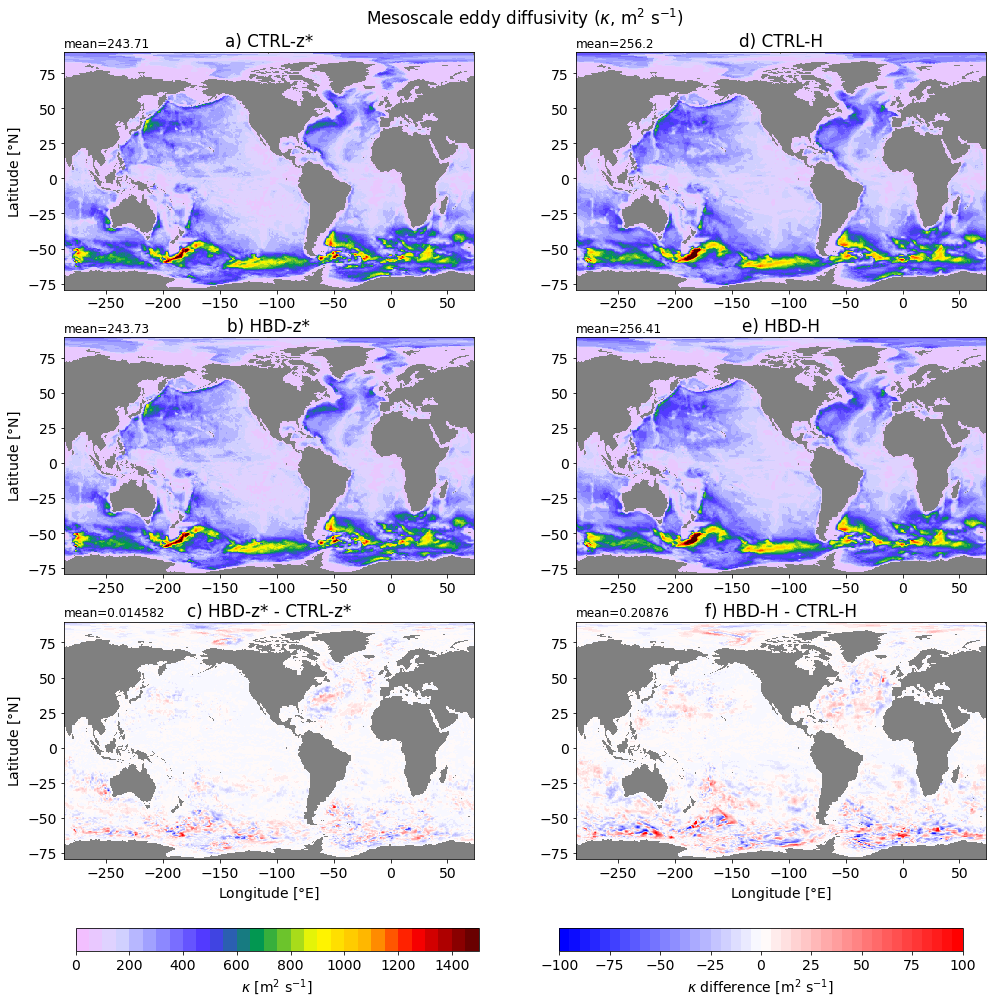

In [7]:
%matplotlib inline

variable = ['diftrblo']

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
plt.suptitle(r'Mesoscale eddy diffusivity ($\kappa$, m$^2$ s$^{-1}$)', y=0.94)
ax1 = ax.flatten()
for i in range(len(exps)):
  ds = xr.open_dataset(path2+exps[i]+'/ncfiles/'+exps[i]+'_avg_mixing_coeffs.nc')
  if i == 0:
   C1 = np.ma.masked_invalid(ds.diftrelo.values)
   cb1 = xyplot(C1, grd.geolon, grd.geolat, grd.area_t, title='a) '+str(labels[i]), axis=ax1[i], clim=(0,1500), 
         nbins=50, extend='neither',add_cbar=False, annotate=True)
   ax1[i].set_xlabel('')
   
  elif i == 1:
   var = np.ma.masked_invalid(ds.diftrelo.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title='b) '+str(labels[i]), 
          axis=ax1[i+1], clim=(0,1500), nbins=50, centerlabels=True, 
          extend='neither',add_cbar=False, annotate=True)
   ax1[i+1].set_xlabel('')

   cb2 = xyplot(var - C1, grd.geolon, grd.geolat, grd.area_t, title='c) '+str(labels[i])+ ' - ' + str(labels[0]), 
          axis=ax1[i+3], clim=(-100,100), nbins=50, centerlabels=True, 
         colormap=plt.cm.bwr, extend='neither',add_cbar=False, annotate=True)
    
  elif i == 2:
   C2 = np.ma.masked_invalid(ds.diftrelo.values) 
   xyplot(C2, grd.geolon, grd.geolat, grd.area_t, title='d) '+str(labels[i]), 
          axis=ax1[i-1], clim=(0,1500),  extend='neither', 
          centerlabels=True, nbins=50,add_cbar=False, annotate=True)
   ax1[i-1].set_xlabel(''); ax1[i-1].set_ylabel('')

  elif i == 3:
   var = np.ma.masked_invalid(ds.diftrelo.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title='e) '+str(labels[i]), 
          axis=ax1[i], clim=(0,1500), nbins=50, centerlabels=True, 
          extend='neither',add_cbar=False, annotate=True)
   ax1[i].set_ylabel(''); ax1[i].set_xlabel('')

   xyplot(var - C2, grd.geolon, grd.geolat, grd.area_t, title='f) '+str(labels[i]) + ' - ' + str(labels[i-1]), 
          axis=ax1[i+2], clim=(-100,100),
         colormap=plt.cm.bwr, extend='neither', centerlabels=True, nbins=50,add_cbar=False, annotate=True)
   ax1[i+2].set_ylabel('')

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.25)

cbar_ax1 = fig.add_axes([0.11, 0.12, 0.35, 0.02])
cbar1=fig.colorbar(cb1, orientation='horizontal', cax=cbar_ax1)
cbar1.set_label(r'$\kappa$ [m$^2$ s$^{-1}$]', fontsize=14)

cbar_ax2 = fig.add_axes([0.53, 0.12, 0.35, 0.02])
cbar2=fig.colorbar(cb2, orientation='horizontal', cax=cbar_ax2)
cbar2.set_label(r'$\kappa$ difference [m$^2$ s$^{-1}$]', fontsize=14)

if saveplot:
    fname = 'PNG/eddy_diffusivity.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

In [ ]:
from mom6_tools.m6plot import xyplot
%matplotlib inline
def get_data_sf(full_path):
  ds = xr.open_mfdataset(full_path, preprocess=preprocess)
  return ds

variables = ['diftrblo', 'difmxylo' ,'difmxybo', 'diftrelo']

def preprocess(ds):
    variables = ['diftrblo', 'difmxylo' ,'difmxybo', 'diftrelo']
    return ds[variables]

In [ ]:
# GM coefficient
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0030_01.nc')
  xyplot(np.ma.masked_invalid(ds[variables[0]].mean('time')[0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(0,1000), title=str(exps[exp]))
  f, ax = plt.subplots(1,1)
  ds[variables[0]][0,:,j,i].plot(ax=ax)


In [ ]:
# Laplacian visc
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0030_01.nc')
  xyplot(np.ma.masked_invalid(ds[variables[1]].mean('time')[0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(0,1000), title=str(exps[exp]))
  f, ax = plt.subplots(1,1)
  ds[variables[1]][0,:,j,i].plot(ax=ax)

In [ ]:
# Biharmonic
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0030_01.nc')
  xyplot(np.ma.masked_invalid(ds[variables[2]].mean('time')[0,:].values), grd.geolon, 
         grd.geolat, area=grd.area_t, clim=(1.0e11,1e13), 
         title=str(exps[exp]))
  f, ax = plt.subplots(1,1)
  ds[variables[2]][0,:,j,i].plot(ax=ax)

In [ ]:
# KHTR (Redi)
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0030_01.nc')
  #ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_30*.nc').sel(time=slice('0028-01-01', '0058-12-31'))
  xyplot(np.ma.masked_invalid(ds[variables[3]].mean('time')[:,:].values), grd.geolon, grd.geolat, clim=(0, 1000), area=grd.area_t, title=str(exps[exp]))

### Sigma 0 profiles

In [ ]:
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
f, ax = plt.subplots(1,1)
i=0
for exp in range(len(exps)):
  ds = xr.open_dataset(path+exps[exp]+'/run/'+exps[exp]+'.mom6.h_0030.nc')
  tmp = ds['rhopot0'][0,:,j,i]
  tmp.differentiate('z_l').plot(ax=ax,y='z_l',label=labels[i])
  i = i +1
ax.set_ylim(0,1000)
ax.invert_yaxis()
ax.legend()

In [ ]:
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
f, ax = plt.subplots(1,1)
i=0
for exp in range(len(exps)):
  ds = xr.open_dataset(path+exps[exp]+'/run/'+exps[exp]+'.mom6.visc_0030.nc')
  ds['N2_int'][0,:,j,i].plot(ax=ax,y='zi',label=labels[i])
  i = i +1
ax.set_ylim(0,500)
#ax.set_xlim(0,1500)

ax.invert_yaxis()
ax.legend()


### Sea ice

In [ ]:
path1 = '/glade/scratch/gmarques/archive/'
path2 = '/ice/proc/climo/'
i = 1
dates1 = ['.29-58','.29-58','.29-58','.29-58']
dates2 = ['_28-58','_28-58','_28-58','_28-58']

%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
var = 'ext_mo_nh'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
#plt.suptitle(reg+', Potential Temperature drift [C], (model - WOA18)')
for i in range(len(exps)):
  ds = xr.open_dataset(path1+exps[i]+path2+exps[i]+'/'+exps[i]+dates1[i]+'/ice_vol_'+exps[i]+dates2[i]+'.nc')
  ds[var].groupby("time.month").mean('time').plot(ax=ax, label=labels[i], lw=2)

ax.grid()
ax.legend(ncol=2)
#if saveplot:
#  fname = 'PNG/{}_temp_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)   

In [ ]:
path1 = '/glade/scratch/gmarques/archive/'
path2 = '/ice/proc/climo/'
i = 1
dates1 = ['.29-48','.29-58','.29-58','.29-58']
dates2 = ['_28-48','_28-58','_28-58','_28-58']

%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
var = 'ext_mo_sh'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
#plt.suptitle(reg+', Potential Temperature drift [C], (model - WOA18)')
for i in range(len(exps)):
  ds = xr.open_dataset(path1+exps[i]+path2+exps[i]+'/'+exps[i]+dates1[i]+'/ice_vol_'+exps[i]+dates2[i]+'.nc')
  ds[var].groupby("time.month").mean('time').plot(ax=ax, label=labels[i], lw=2)

ax.grid()
ax.legend(ncol=2)
#if saveplot:
#  fname = 'PNG/{}_temp_bias.png'.format(reg)
#  plt.savefig(fname, bbox_inches='tight',dpi=300)   